In [5]:
from Functions import *
from sympy import Matrix
import numpy as np
import matplotlib.pyplot as plt

In [8]:
n_sites = 3
h = 1.0
J = 1.0

sh = 2**n_sites # Shape

# Planar Hamiltonian
row_xy, column_xy = get_rows_columns(n_sites)
data_xy = np.full((1,len(row_xy)),2.0*J).flatten()
H_xy = csc_array((data_xy, (row_xy,column_xy)), shape=(sh, sh))

# Transverse Hamiltonian
data_z = -h*get_diagonal_sign(n_sites)
row_z = np.arange(sh)
H_z = csc_array((data_z, (row_z,row_z)), shape=(sh, sh))

# Total Hamiltonian
H = H_xy + H_z
H

<8x8 sparse array of type '<class 'numpy.float64'>'
	with 16 stored elements in Compressed Sparse Column format>

In [9]:
Matrix(H.toarray())

Matrix([
[-3.0,    0,    0,   0,    0,   0,   0,   0],
[   0, -1.0,  2.0,   0,    0,   0,   0,   0],
[   0,  2.0, -1.0,   0,  2.0,   0,   0,   0],
[   0,    0,    0, 1.0,    0, 2.0,   0,   0],
[   0,    0,  2.0,   0, -1.0,   0,   0,   0],
[   0,    0,    0, 2.0,    0, 1.0, 2.0,   0],
[   0,    0,    0,   0,    0, 2.0, 1.0,   0],
[   0,    0,    0,   0,    0,   0,   0, 3.0]])

In [10]:
def get_sparse_pure_hamiltonian(n_sites,J,h):
    
    sh = 2**n_sites # Shape
    
    row_xy, column_xy = get_rows_columns(n_sites)
    data_xy = np.full((1,len(row_xy)),2.0*J).flatten()
    H_xy = csc_array((data_xy, (row_xy,column_xy)), shape=(sh, sh))

    data_z = -h*get_diagonal_sign(n_sites)
    row_z = np.arange(sh)
    H_z = csc_array((data_z, (row_z,row_z)), shape=(sh, sh))

    return H_xy + H_z       

In [12]:
H = get_sparse_pure_hamiltonian(4,1.0,1.0)
Matrix(H.toarray())

Matrix([
[-4.0,    0,    0,   0,    0,   0,   0,   0,    0,   0,   0,   0,   0,   0,   0,   0],
[   0, -2.0,  2.0,   0,    0,   0,   0,   0,    0,   0,   0,   0,   0,   0,   0,   0],
[   0,  2.0, -2.0,   0,  2.0,   0,   0,   0,    0,   0,   0,   0,   0,   0,   0,   0],
[   0,    0,    0,   0,    0, 2.0,   0,   0,    0,   0,   0,   0,   0,   0,   0,   0],
[   0,    0,  2.0,   0, -2.0,   0,   0,   0,  2.0,   0,   0,   0,   0,   0,   0,   0],
[   0,    0,    0, 2.0,    0,   0, 2.0,   0,    0, 2.0,   0,   0,   0,   0,   0,   0],
[   0,    0,    0,   0,    0, 2.0,   0,   0,    0,   0, 2.0,   0,   0,   0,   0,   0],
[   0,    0,    0,   0,    0,   0,   0, 2.0,    0,   0,   0, 2.0,   0,   0,   0,   0],
[   0,    0,    0,   0,  2.0,   0,   0,   0, -2.0,   0,   0,   0,   0,   0,   0,   0],
[   0,    0,    0,   0,    0, 2.0,   0,   0,    0,   0, 2.0,   0,   0,   0,   0,   0],
[   0,    0,    0,   0,    0,   0, 2.0,   0,    0, 2.0,   0,   0, 2.0,   0,   0,   0],
[   0,    0,    0,   0,    0,   0,

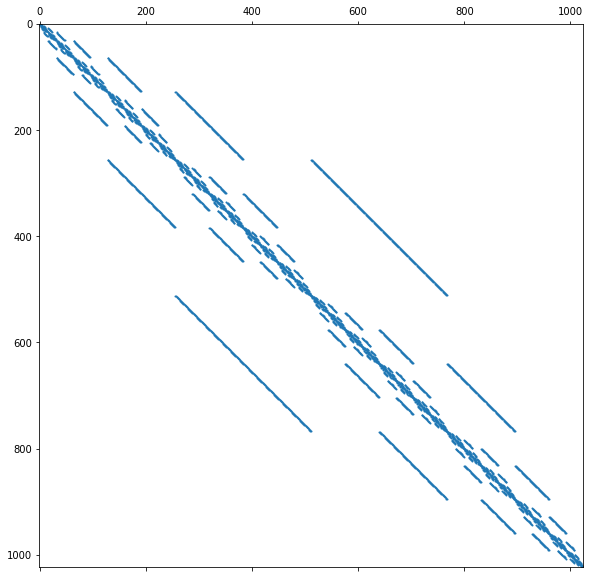

In [26]:
H = get_sparse_pure_hamiltonian(10,1.0,1.0)
fig = plt.figure(figsize=(10,10),)
plt.spy(H,marker=".",markersize=2)